# Colour
Erik Matovič

In [1]:
import cv2
import numpy as np
from typing import Any, Tuple
from matplotlib import pyplot as plt

print(cv2.__version__)

4.7.0


## 1. Load image
Define functions:

In [2]:
def show_img(img: cv2.Mat, txt: str) -> None:
    """
    Show images
    :param: img - image
    :param: txt - text of a window
    """
    cv2.imshow(txt, img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

def resize_img(img: cv2.Mat, scale_percent: int) -> cv2.Mat:
    """
    Resizing images.
    :param: img - image
    :param: scale_percent - percent by which the image is resized
    :return: Resized image
    """
    # calculate the scale percent of original dimensions
    width = int(img.shape[1] * scale_percent / 100)
    height = int(img.shape[0] * scale_percent / 100)

    # dsize
    dsize = (width, height)

    img_resize = cv2.resize(img, dsize)
    return img_resize


Load images:

In [3]:
img1 = cv2.imread('/home/erik/FIIT/2_Ing/2_semester/PVID/cvicenia/figures/TCGA-18-5592-01Z-00-DX1.tif')
img2 = cv2.imread('/home/erik/FIIT/2_Ing/2_semester/PVID/cvicenia/figures/TCGA-21-5784-01Z-00-DX1.tif')
img3 = cv2.imread('/home/erik/FIIT/2_Ing/2_semester/PVID/cvicenia/figures/TCGA-21-5786-01Z-00-DX1.tif')

show_img(img1, 'image')
show_img(img2, 'image')
show_img(img3, 'image')

Qt: Session management error: None of the authentication protocols specified are supported


In [4]:
img1_resize = resize_img(img1, 50) 
img2_resize = resize_img(img2, 50) 
img3_resize = resize_img(img3, 50) 
show_img(img1_resize, 'image')
show_img(img2_resize, 'image')
show_img(img3_resize, 'image')

<Figure size 640x480 with 0 Axes>

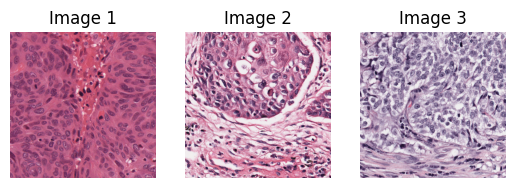

In [5]:
plt.figure()
f, axarr = plt.subplots(1,3)

img1_rgb = cv2.cvtColor(img1_resize, cv2.COLOR_BGR2RGB)
img2_rgb = cv2.cvtColor(img2_resize, cv2.COLOR_BGR2RGB)
img3_rgb = cv2.cvtColor(img3_resize, cv2.COLOR_BGR2RGB)

axarr[0].imshow(img1_rgb, cmap = 'gray')
axarr[1].imshow(img2_rgb, cmap = 'gray')
axarr[2].imshow(img3_rgb, cmap = 'gray')

axarr[0].set_title('Image 1')
axarr[1].set_title('Image 2')
axarr[2].set_title('Image 3')

axarr[0].axis('off')
axarr[1].axis('off')
axarr[2].axis('off')

plt.show()

In [6]:
img1_grayscale = cv2.cvtColor(img1_resize, cv2.COLOR_BGR2GRAY)
img2_grayscale = cv2.cvtColor(img2_resize, cv2.COLOR_BGR2GRAY)
img3_grayscale = cv2.cvtColor(img3_resize, cv2.COLOR_BGR2GRAY)

show_img(img1_grayscale, 'image')
show_img(img2_grayscale, 'image')
show_img(img3_grayscale, 'image')

<Figure size 640x480 with 0 Axes>

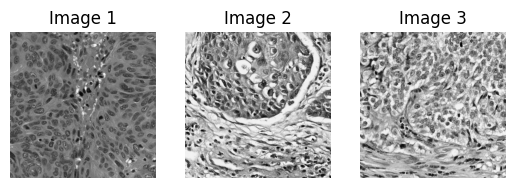

In [7]:
plt.figure()
f, axarr = plt.subplots(1,3)

axarr[0].imshow(img1_grayscale, cmap = 'gray')
axarr[1].imshow(img2_grayscale, cmap = 'gray')
axarr[2].imshow(img3_grayscale, cmap = 'gray')

axarr[0].set_title('Image 1')
axarr[1].set_title('Image 2')
axarr[2].set_title('Image 3')

axarr[0].axis('off')
axarr[1].axis('off')
axarr[2].axis('off')

plt.show()

## 2. Image pre-processing
Resampling
 - resizing images